In [1]:
import numpy as np
import pandas as pd

In [2]:
# 读取鸢尾花数据集 header 参数指定标题行 默认为0 ， 若无标题则 header = None
data = pd.read_csv(r"iris.csv",header = 0)
# 获取数据的简单说明
# =========================
# 显示前 n 条记录 默认 n = 5
# data.head(10)
# 显示末尾 n 条记录  默认 n = 5
# data.tail()
# 随机抽取 n 条记录 默认 n = 1 
# data.sample(10)
# 查看数据集记录数
# len(data)
# ===========================

# 对文本进行格式处理
# ============================================
# 将类别文本映射成数值类型 
data["species"] = data["species"].map({"setosa":0,"virginica":1,"versicolor":2 })
# 删除不需要的列, axix 0 表示行 1 表示列 inplace 表示在原有的数据集中更新
# 等同于 data = data.drop("sepal_length",axis = 1)
#data.drop("sepal_length",axis = 1,inplace = True)
# .any（） 表示，若有重复的记录则返回 true
#data.duplicated().any()
# 删除重复的记录 
data.drop_duplicates(inplace = True)
# 长各个类别的鸢尾花具有多少条记录
# data["species"].value_counts()
# data.sample(10)

In [3]:
class KNN:
    """使用 python 语言实现 K 近邻算法。（实现分类） """
    
    def __init__(self,k):
        """初始化方法
        Parameters
        -----
        k ; int
            邻居的个数。
        """
        self.k = k 
        
    def fit(self, X, y):
        """训练样本方法（惰性学习）
        Parameters
        -----
        X : 类数组类型(比如list ndarray dataframe)， 形状为：[样本数量 , 特征数量]
            待训练的样本特征（属性）
        y : 类数组类型， 形状为：[样本数量] 
            每个样本的目标值（标签） 
        """
        # 将 X 转换为 ndarray 数组类型
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    
    def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测。
        Parameters
        -----
        X : 类数组类型(比如list ndarray dataframe)， 形状为：[样本数量 , 特征数量]
            待训练的样本特征（属性）
        Returns
        -----
        result : 数组类型
            预测的结果。
        """
        
        X = np.asarray(X)
        result = []
        # 对 ndarray 数组进行遍历，每次取数组中的一行。
        for x in X :
            # 对于测试集中的每一个样本， 依次与训练集中的所有样本求欧式距离
            # 欧式距离即 各个坐标点差的平方和开根。
            dis = np.sqrt(np.sum((x - self.X) ** 2 , axis = 1))
            # 返回每个元素在原数组（排序之前的数组）中的索引位置
            # eg:  x = np.array([20,39,12,3])
            #      x.argsort() output array([3, 2, 0, 1])
            index = dis.argsort()
            # 进行排序后的截断，只取前 k 个元素。（即取距离最近的 k 个元素处理）
            index = index[:self.k]
            # 返回数组中每个元素出现的次数（元素必须为非负的整数）
            # count 返回值表示索引值出现的次数 eg [0,4,2,1,1] 表示 0 出现 0 次 1 出现 4 次
            count = np.bincount(self.y[index])
            # 返回ndarry数组中，值最大的元素对应的索引,就是我们判定的类别
            result.append(count.argmax())
        return np.asarray(result)
        
    def predictWithWeights(self,X):
        """根据参数传递的样本，对样本数据进行预测,并考虑权重，使用距离的倒数作为权重
        Parameters
        -----
        X : 类数组类型(比如list ndarray dataframe)， 形状为：[样本数量 , 特征数量]
            待训练的样本特征（属性）
        Returns
        -----
        result : 数组类型
            预测的结果。
        """
        
        X = np.asarray(X)
        result = []
        # 对 ndarray 数组进行遍历，每次取数组中的一行。
        for x in X :
            # 对于测试集中的每一个样本， 依次与训练集中的所有样本求欧式距离
            # 欧式距离即 各个坐标点差的平方和开根。
            dis = np.sqrt(np.sum((x - self.X) ** 2 , axis = 1))
            # 返回每个元素在原数组（排序之前的数组）中的索引位置
            # eg:  x = np.array([20,39,12,3])
            #      x.argsort() output array([3, 2, 0, 1])
            index = dis.argsort()
            # 进行排序后的截断，只取前 k 个元素。（即取距离最近的 k 个元素处理）
            index = index[:self.k]
            # 返回数组中每个元素出现的次数（元素必须为非负的整数）使用 weights 考虑权重，为距离的倒数
            # count 返回值表示索引值出现的次数 eg [0,4,2,1,1] 表示 0 出现 0 次 1 出现 4 次
            count = np.bincount(self.y[index],weights = 1 / dis[index])
            # 返回ndarry数组中，值最大的元素对应的索引,就是我们判定的类别
            result.append(count.argmax())
        return np.asarray(result)
    
        

In [4]:
# 提取每个类别的鸢尾花数据#
t0 = data[data["species"] == 0]
t1 = data[data["species"] == 1]
t2 = data[data["species"] == 2]
# 设置权重
haven = 42
# 打乱训练集的记录条目,对每个类别的数据进行洗牌
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)
# 将记录区分为训练集与数据集,按照纵向的方式，将t0-t2中前40项组合拼接
train_X = pd.concat([t0.iloc[:haven,:-1],t1.iloc[:haven,:-1],t2.iloc[:haven,:-1]],axis = 0)
train_y = pd.concat([t0.iloc[:haven,-1],t1.iloc[:haven,-1],t2.iloc[:haven,-1]],axis = 0)
# 测试集 同训练集
test_X = pd.concat([t0.iloc[haven:,:-1],t1.iloc[haven:,:-1],t2.iloc[haven:,:-1]],axis = 0)
test_y = pd.concat([t0.iloc[haven:,-1],t1.iloc[haven:,-1],t2.iloc[haven:,-1]],axis = 0)
# 创建 KNN 对象 ，进行训练与测试
knn = KNN(k=3)
# 进行训练
knn.fit(train_X,train_y)
# 进行测试，获得测试结果
result = knn.predict(test_X)
# display(result)
# display(test_y)

display(np.sum(result == test_y))
display(np.sum(result == test_y) / len(result))

21

1.0

In [5]:
# 考虑权重，进行测试
result2 = knn.predictWithWeights(test_X)
display(np.sum(result2 == test_y))
display(np.sum(result2 == test_y) / len(result))

21

1.0

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#from matplotlib.font_manager import * 
#myfont = FontProperties(fname='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/wqy-microhei.ttf')  
# 默认情况下 matplotlib 不支持中文显示，设置任意支持中文的字体即可
mpl.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'

# 设置中文字体中正常显示负号（-）。即不适用 unicode 中的 “-” 展示
mpl.rcParams["axes.unicode_minus"] = False

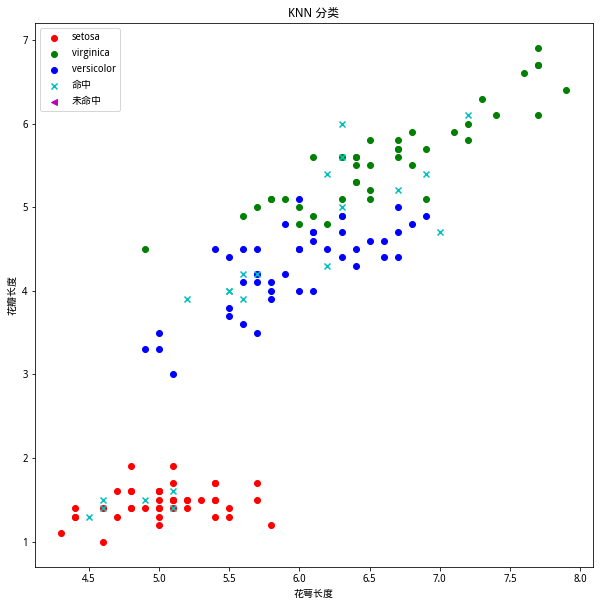

In [8]:
# "setosa":0,"virginica":1,"versicolor":2 
# 设置画布大小
plt.figure(figsize=(10,10))
# 绘制训练集中的数据
plt.scatter(x = t0["sepal_length"][:haven],y = t0["petal_length"][:haven],color = "r" , label = "setosa")
plt.scatter(x = t1["sepal_length"][:haven],y = t1["petal_length"][:haven],color = "g" , label = "virginica")
plt.scatter(x = t2["sepal_length"][:haven],y = t2["petal_length"][:haven],color = "b" , label = "versicolor")

# 绘制测试集中的数据
# 获取所有预测正确的值
right = test_X[result == test_y]
# 获取所有预测错误的值
wrong = test_X[result != test_y]
plt.scatter(x = right["sepal_length"],y = right["petal_length"],color = "c" ,marker = "x",label = "命中")
plt.scatter(x = wrong["sepal_length"],y = wrong["petal_length"],color = "m" ,marker = "<",label = "未命中")
# 设置坐标轴
plt.xlabel(u"花萼长度")
plt.ylabel(u"花瓣长度")
plt.title(u"KNN 分类")
# 设置图例
plt.legend(loc="best")
plt.show()

